In [10]:
# %load cp_imports.py
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Use retina backend for better figures
%config InlineBackend.figure_format = 'retina'


# Heat Equation

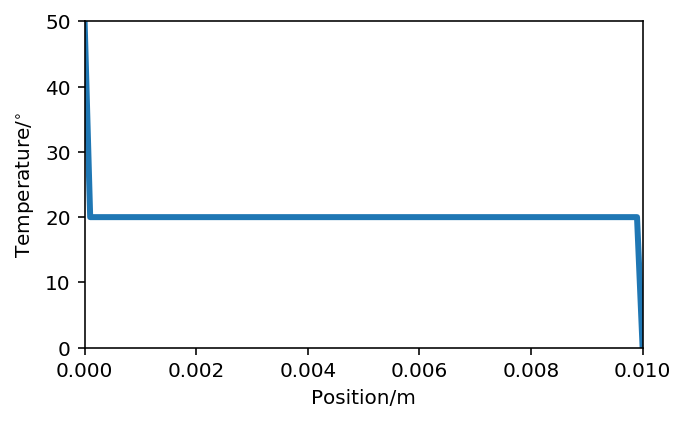

In [7]:
from matplotlib import animation


def gauss_solver_band(band):
    """
    Solve linear system in band matrix form with Gauss method
    
    band: coefficient matrix with shape(n, n+1), n equals
                 number of variables. The last column is the right 
                 side of equations.
 
    return array of solution
    """
    coefficient = band.copy()
    # number of variables 
    dimension = coefficient.shape[0]
    varibles = np.zeros(dimension)

    for i in range(dimension-1):
        coefficient[i] = coefficient[i] / coefficient[i, i]
        coefficient[i+1] = coefficient[i+1] - coefficient[i+1, i] * coefficient[i]
    coefficient[-1] = coefficient[-1] / coefficient[-1, -2]
    
    # Solve xi in reverse order
    varibles[-1] = coefficient[-1, -1] 
    for i in range(-2, -dimension - 1, -1):
        # Be carefull when using negative index, because that's related to array's shape!
        varibles[i] = coefficient[i, -1] - coefficient[i,i] * varibles[i+1]
   
    return varibles


temp0, temp1 = 50, 0
length = 1e-2 # Unit: m
D = 4.25e-6
dx = length * 1e-2
dt = 10 * dx**2 / D 
t_end = length**2 / D
x = np.arange(0, length+dx, dx)
nx = len(x)
alpha = gamma = - D * dt / dx**2
beta = 1 + 2 * D * dt / dx**2 

temp_prev = np.ones_like(x, dtype="float") * 20 # Initial temp: 20
temp_prev[[0, -1]] = temp0, temp1
temp_next = np.zeros_like(x, dtype="float")
boundary = np.zeros(nx-2, dtype="float")
boundary[[0, -1]] = alpha * temp0, gamma * temp1
coe = np.zeros((nx-2, nx-1), dtype="float")
# Construct band matrix 
np.fill_diagonal(coe, beta)
np.fill_diagonal(coe[1:], alpha)
np.fill_diagonal(coe[:,1:], gamma)
coe[:, -1] = temp_prev[1:-1] - boundary


def frame_iter():
    global temp_next, temp_prev
    t = 0
    while t <= t_end:
        coe[:, -1] = temp_prev[1:-1] - boundary
        temp_next[1:-1] = gauss_solver_band(coe)
        temp_next[[0, -1]] = temp0, temp1
        temp_prev[:] = temp_next[:]
        ax.set_title(f"Time: {t:.2F}")
        line.set_data(x, temp_next)
        yield line, 
        t += dt 
        

def init():
    line.set_data(x, temp_prev)
    return line,
    

frame = frame_iter()
update = lambda x: next(frame)
    
fig, ax = plt.subplots(figsize=(5, 3))
line, = ax.plot([], [], lw=3)
ax.set_xlabel("Position/m")
ax.set_ylabel(r"Temperature/$^{\circ}$")
ax.set_xlim(0, length)
ax.set_ylim(0, 50)
ani = animation.FuncAnimation(fig, update, init_func=init, \
                             frames=300, interval=100)
# ani.save("heat_equation_6-1.gif", writer="imagemagick", fps=20)


# Diffusion Equation 

Solve
\begin{equation}
    \frac{\partial u}{\partial t} = D\frac{\partial ^2 u}{\partial ^2 x}
\end{equation}
with initial conditon
\begin{equation}
    u(0, x) = \frac{1}{\sqrt{2\pi\sigma^2}} \text{e}^{-x^2/2\sigma^2}
\end{equation}  
Assume solution has the same form as $u(0,x)$, with a time-dependent
$\sigma(t)$. Substitute trail solution into the PDE, we get how $\sigma$
evolves in time.
\begin{equation}
    \sigma(t) = \sqrt{2Dt+ \sigma_0^2} 
\end{equation}

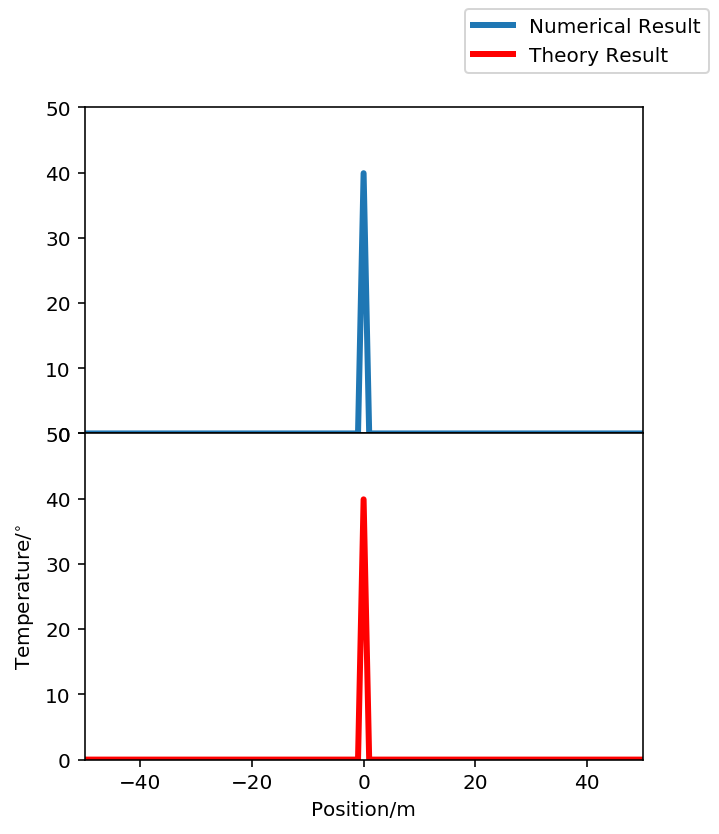

In [11]:
from matplotlib import animation


def gauss_solver_band(band):
    """
    Solve linear system in band matrix form with Gauss method
    
    band: coefficient matrix with shape(n, n+1), n equals
                 number of variables. The last column is the right 
                 side of equations.
 
    return array of solution
    """
    coefficient = band.copy()
    # number of variables 
    dimension = coefficient.shape[0]
    varibles = np.zeros(dimension)

    for i in range(dimension-1):
        coefficient[i] = coefficient[i] / coefficient[i, i]
        coefficient[i+1] = coefficient[i+1] - coefficient[i+1, i] * coefficient[i]
    coefficient[-1] = coefficient[-1] / coefficient[-1, -2]
    
    # Solve xi in reverse order
    varibles[-1] = coefficient[-1, -1] 
    for i in range(-2, -dimension - 1, -1):
        # Be carefull when using negative index, because that's related to array's shape!
        varibles[i] = coefficient[i, -1] - coefficient[i,i] * varibles[i+1]
   
    return varibles


def pulse(x, sigma0, t):
    sigma_square = sigma0**2 + 2 * D * t
    return 1/(2 * np.pi * sigma_square)**0.5 * np.exp(-0.5 * x**2/sigma_square)
    

temp0, temp1 = 0, 0 # Infinite boundary condition
length = 1e2 # Unit: m
sigma0 = 1e-2
D = 4.25e-6
dx = length * 1e-2
dt = 1e1 * dx**2 / D 
t_end = length**2 / D
x = np.arange(0, length+dx, dx) - length/2
nx = len(x)
alpha = gamma = - D * dt / dx**2
beta = 1 + 2 * D * dt / dx**2 

temp_prev = pulse(x, sigma0, 0)# Initial pulse
temp_prev[[0, -1]] = temp0, temp1
temp_next = np.zeros_like(x, dtype="float")
temp_next[[0, -1]] = temp0, temp1

boundary = np.zeros(nx-2, dtype="float")
boundary[[0, -1]] = alpha * temp0, gamma * temp1
coe = np.zeros((nx-2, nx-1), dtype="float")
# Construct band matrix 
np.fill_diagonal(coe, beta)
np.fill_diagonal(coe[1:], alpha)
np.fill_diagonal(coe[:,1:], gamma)
coe[:, -1] = temp_prev[1:-1] - boundary


def frame_iter():
    global temp_next, temp_prev
    t = 0
    while t <= t_end:
        coe[:, -1] = temp_prev[1:-1] - boundary
        temp_next[1:-1] = gauss_solver_band(coe)
        t += dt         
        temp_prev[:] = temp_next[:]
        axs[0].set_title(f"Time: {t:.2F}")
        line1.set_data(x, temp_next)
        line2.set_data(x, pulse(x, sigma0, t))
        yield line1, line2 
        

def init():
    line1.set_data(x, temp_prev)
    line2.set_data(x, temp_prev)
    return line1, line2
    

frame = frame_iter()
update = lambda x: next(frame)
    
fig, axs = plt.subplots(figsize=(5, 6), nrows=2, ncols=1, sharex=True, sharey=True)
line1, = axs[0].plot([], [], lw=3, label="Numerical Result")
line2, = axs[1].plot([], [], lw=3, c='r', label="Theory Result")
axs[1].set_xlabel("Position/m")
axs[1].set_ylabel(r"Temperature/$^{\circ}$")
axs[1].set_xlim(-length/2, length/2)
axs[1].set_ylim(0, 50)
fig.subplots_adjust(hspace=0)
fig.legend()
ani = animation.FuncAnimation(fig, update, init_func=init, \
                             frames=300, interval=100)
# ani.save("heat_equation_6-1.gif", writer="imagemagick", fps=20)


# Laplace Equation

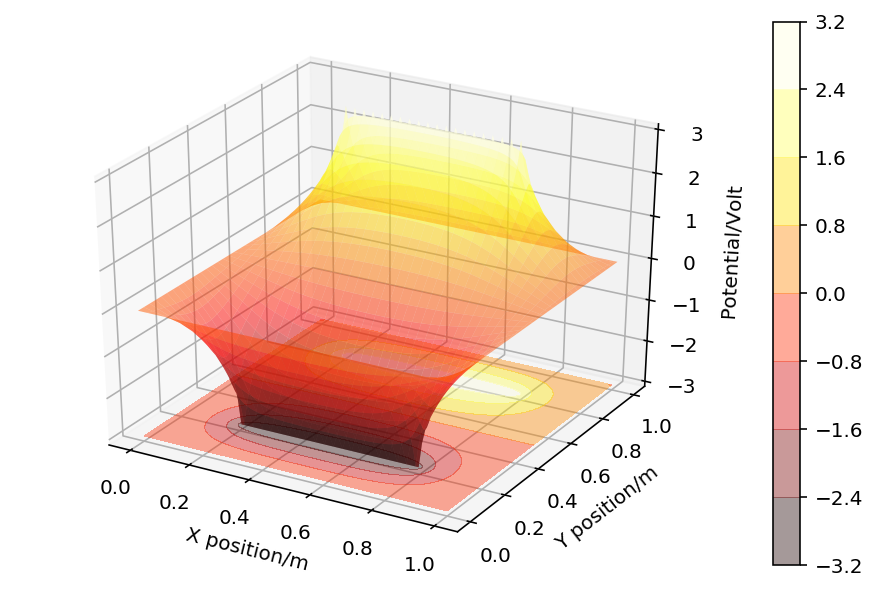

In [12]:
from mpl_toolkits.mplot3d import Axes3D
# Calculate electrostatic potential of a 2x2 square with given boundary condition
v0 = 5  # Unit: Volts
tol = 1e-5
dy = dx = 1e-2
length = 1.  # length of square to be solved
omega = 2. / (1 + np.sin(dx / length * np.pi))
x = np.arange(0, length + dx, dx)
y = np.arange(0, length + dy, dy)
xx, yy = np.meshgrid(x, y)
# Create 2-D array to store potential value
u_next = np.zeros_like(xx, dtype="float")  # Half-int points
# Set boundary condition, note for the orientation of meshgrid
u_next[0, :] = 0  # y=0 boundary
u_next[-1, :] = 0  # y=L boundary
u_next[:, 0] = 0  # x=0 boundary
u_next[:, -1] = 0  # x=L boundary
u_next[20,20:81] = -3. 
u_next[80,20:81] = 3.


def frame_iter():
    err = 1
    while err > tol:
        _temp_u = np.copy(u_next)

        # Black points PartII
        u_next[2:-1:2, 2:-1:2] = (1 - omega) * u_next[2:-1:2, 2:-1:2] + omega / 4 \
                                * (u_next[2:-1:2, 1:-2:2] + u_next[2:-1:2, 3:-1:2] \
                                + u_next[1:-2:2, 2:-1:2] + u_next[3:-1:2,2:-1:2])
        u_next[21,20:80] = -3. 
        u_next[80,20:80] = 3.
        # Black points PartI
        u_next[1:-1:2, 1:-1:2] = (1 - omega) * u_next[1:-1:2, 1:-1:2] + omega / 4 \
                                * (u_next[0:-1:2, 1::2] + u_next[2::2, 1::2] \
                                   + u_next[1::2, :-1:2] + u_next[1::2, 2::2])
        u_next[21,20:80] = -3. 
        u_next[80,20:80] = 3.
        # White points PartII
        u_next[1:-1:2, 2:-1:2] = (1 - omega) * u_next[1:-1:2, 2:-1:2] + omega / 4 \
                                * (u_next[1:-1:2, 1:-2:2] + u_next[1:-1:2, 3::2] \
                                   + u_next[0:-2:2, 2:-1:2] + u_next[2::2,2:-1:2])  
        u_next[21,20:80] = -3. 
        u_next[80,20:80] = 3.
        # White points PartI
        u_next[2:-1:2, 1:-1:2] = (1 - omega) * u_next[2:-1:2, 1:-1:2] + omega / 4 \
                                * (u_next[2:-1:2, :-2:2] + u_next[2:-1:2, 2::2] \
                                   + u_next[1:-2:2, 1:-1:2] + u_next[3::2,1:-1:2])

        u_next[21,20:80] = -3. 
        u_next[80,20:80] = 3.
        err = np.mean(abs(u_next - _temp_u))
    return u_next

u_final = frame_iter()
fig, ax = plt.subplots(figsize=(8, 5), subplot_kw={"projection": "3d"})
# fig, ax = plt.subplots()
ax.plot_surface(xx, yy, u_final, cmap='hot', vmin=-3, vmax=3, alpha=.5)
ax.set_xlabel("X position/m")
ax.set_ylabel("Y position/m")
ax.set_zlabel("Potential/Volt")
sur = ax.contourf(xx, yy, u_final, zdir='z', offset=-3, cmap='hot', alpha=0.4, vmin=-3, vmax=3)
fig.colorbar(sur)
